In [18]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# TensorFlow imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Dataset Info

In [19]:
image_folder = os.path.join('datasets', 'train_images')
img_height, img_width = 250, 250  # size of images
num_classes = 2  # me - not_me

In [20]:
dataset = keras.preprocessing.image_dataset_from_directory(
    image_folder,
    seed=42,
    image_size=(img_height, img_width),
    label_mode='categorical',
    shuffle=True)

Found 180 files belonging to 2 classes.


In [21]:
class_names = dataset.class_names
class_names

['me', 'not_me']

In [22]:
def get_classname(class_names, mask):
    '''
    Returns an element of the array 'class_names' with the index
    where the maximum value from the 'mask' array is located.
    Used to get classname with categorical labels.

    Parameters:
        class_names (array-like): Target array
        mask (array-like): Mask array, elements must be numbers
    Returns:
        One of the element from 'class_names'

    >>> get_classname(['first', 'second'], [0, 1])
    'second'
    >>> get_classname(['first', 'second', third], [1, 0, 0])
    'first'
    '''

    assert len(class_names) == len(
        mask), "The arrays must be of the same length"

    return class_names[np.array(mask).argmax(axis=0)]

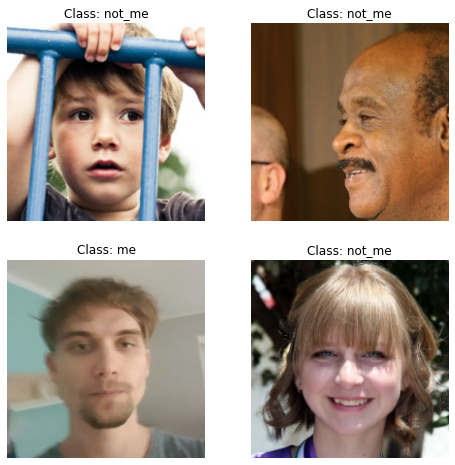

In [23]:
sqrt_img = 2  # images per row / col.
# The square root of the total number of images shown

plt.figure(figsize=(8, 8))
for images, labels in dataset.take(3):
    for index in range(sqrt_img**2):
        # grid 'sqrt_img' x 'sqrt_img'
        plt.subplot(sqrt_img, sqrt_img, index + 1)
        plt.imshow(images[index] / 255)
        class_name = get_classname(class_names, labels[index])
        plt.title("Class: {}".format(class_name))
        plt.axis("off")

# Augmentation

In [24]:
batch_size = 16

In [25]:
# Create data generator based on ImageDataGenerator object
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=(0.7, 1),
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    image_folder,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 180 images belonging to 2 classes.


(-0.5, 249.5, 249.5, -0.5)

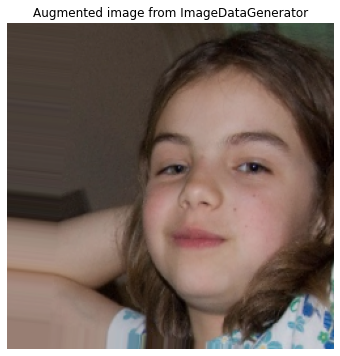

In [26]:
# To see next augmented image
image, label = train_generator.next()

plt.figure(figsize=(6, 6))
plt.imshow(image[0] / 255)  # first image from batch
plt.title("Augmented image from ImageDataGenerator")
plt.axis("off")

Generate n samples for each image

In [27]:
n = 5

aug_image_folder = os.path.join('datasets', 'train_augmented_images')
if not os.path.exists(aug_image_folder):
    os.makedirs(aug_image_folder)  # create folder if doesn't exist

In [28]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=(0.7, 1),
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest')

In [29]:
# classes: 'me' and 'not_me'
image_folder_to_generate = os.path.join(image_folder, 'me')
image_folder_to_save = os.path.join(aug_image_folder, 'me')
if not os.path.exists(image_folder_to_save):
    os.makedirs(image_folder_to_save)  # create folder if doesn't exist

i = 0
total = len(os.listdir(image_folder_to_generate))  # number of files in folder
for filename in os.listdir(image_folder_to_generate):
    print("Step {} of {}".format(i+1, total))
    # for each image in folder: read it
    image_path = os.path.join(image_folder_to_generate, filename)
    image = keras.preprocessing.image.load_img(
        image_path, target_size=(img_height, img_width, 3))
    image = keras.preprocessing.image.img_to_array(
        image)  # from image to array
    # shape from (250, 250, 3) to (1, 250, 250, 3)
    image = np.expand_dims(image, axis=0)

    # create ImageDataGenerator object for it
    current_image_gen = train_datagen.flow(image,
                                           batch_size=1,
                                           save_to_dir=image_folder_to_save,
                                           save_prefix=filename,
                                           save_format="jpg")

    # generate n samples
    count = 0
    for image in current_image_gen:  # accessing the object saves the image to disk
        count += 1
        if count == n:  # n images were generated
            break
    print('\tGenerate {} samples for file {}'.format(n, filename))
    i += 1

print("\nTotal number images generated = {}".format(n*total))

Step 1 of 45
	Generate 5 samples for file me (10).jpg
Step 2 of 45
	Generate 5 samples for file me (11).jpg
Step 3 of 45
	Generate 5 samples for file me (12).jpg
Step 4 of 45
	Generate 5 samples for file me (13).jpg
Step 5 of 45
	Generate 5 samples for file me (14).jpg
Step 6 of 45
	Generate 5 samples for file me (15).jpg
Step 7 of 45
	Generate 5 samples for file me (16).jpg
Step 8 of 45
	Generate 5 samples for file me (17).jpg
Step 9 of 45
	Generate 5 samples for file me (18).jpg
Step 10 of 45
	Generate 5 samples for file me (19).jpg
Step 11 of 45
	Generate 5 samples for file me (20).jpg
Step 12 of 45
	Generate 5 samples for file me (21).jpg
Step 13 of 45
	Generate 5 samples for file me (22).jpg
Step 14 of 45
	Generate 5 samples for file me (23).jpg
Step 15 of 45
	Generate 5 samples for file me (24).jpg
Step 16 of 45
	Generate 5 samples for file me (25).jpg
Step 17 of 45
	Generate 5 samples for file me (26).jpg
Step 18 of 45
	Generate 5 samples for file me (27).jpg
Step 19 of 45
	Gene